In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
#reading CSV with pandas
Taxonomy = pd.read_csv('../input/birdclef-2022/eBird_Taxonomy_v2021.csv')
test = pd.read_csv('../input/birdclef-2022/test.csv')
train_metadata = pd.read_csv('../input/birdclef-2022/train_metadata.csv')
submission = pd.read_csv('../input/birdclef-2022/sample_submission.csv')
from os import path
from pydub import AudioSegment
import seaborn as sns
from scipy.io.wavfile import read
from statsmodels.graphics.tsaplots import plot_acf
from scipy import signal
from scipy.io import wavfile


#transform into dataframe
df_taxonomy = pd.DataFrame(Taxonomy)

df_test = pd.DataFrame(test)

df_train = pd.DataFrame(train_metadata)

df_submission = pd.DataFrame(submission)









In [2]:
#opening the scored bird file
with open('../input/birdclef-2022/scored_birds.json','r') as f:
    data = json.load(f)
    

In [3]:
#index of the scored rows
index_row_scored = []
for i in data:
    a=i.strip('"')
    for j in range(len(df_train["primary_label"])):
        if df_train["primary_label"][j] == a:
            index_row_scored.append(j)


In [4]:

from os import listdir
from os.path import isfile, join
rated_list = []
for i in data:
    onlyfiles = [f for f in listdir("../input/birdclef-2022/train_audio/"+i) if isfile(join("../input/birdclef-2022/train_audio/"+i,f))]
    rated_list.append(i)
    rated_list.append(onlyfiles)
    

In [5]:
#Function to extract features from the audios
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features


In [6]:
#We will use a dataframe with the scored birds just to see that everything works fine 
#without spending so much time
df_scored = df_train.copy()
for i in df_train.index:
    #if df_train['rating'][i]<2.5:
        #df_train.drop([i],axis = 0, inplace = True)
    if i not in index_row_scored:
        df_scored.loc[i,'primary_label'] = 'other'

In [7]:
df_scored

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,other,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,other,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,other,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,other,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,other,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14847,other,[],"['adult', 'song']",22.6499,120.2872,Geopelia striata,Zebra Dove,Jerome Chie-Jen Ko,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:36,https://www.xeno-canto.org/629769,zebdov/XC629769.ogg
14848,other,[],"['adult', 'sex uncertain', 'song']",1.4168,103.7287,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,08:00,https://www.xeno-canto.org/642415,zebdov/XC642415.ogg
14849,other,[],"['adult', 'call', 'sex uncertain']",1.4347,103.7043,Geopelia striata,Zebra Dove,Kim Chuah Lim,Creative Commons Attribution-NonCommercial-Sha...,4.0,09:00,https://www.xeno-canto.org/665873,zebdov/XC665873.ogg
14850,other,[],['song'],3.3508,101.2451,Geopelia striata,Zebra Dove,Jelle Scharringa,Creative Commons Attribution-NonCommercial-Sha...,2.5,11:15,https://www.xeno-canto.org/666194,zebdov/XC666194.ogg


In [8]:

from tqdm import tqdm
# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df_scored.iterrows()):
    file_name = os.path.join(os.path.abspath("../input/birdclef-2022/train_audio/"),str(row["filename"]))
    final_class_labels=row["primary_label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1423it [10:41,  1.68it/s]/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=769
  return f(*args, **kwargs)
14852it [2:22:26,  1.74it/s]


In [9]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','primary_label'])
extracted_features_df.head()

,feature,primary_label
0,"[-209.96172, 140.32973, 21.45812, 29.218266, -...",other
1,"[-415.57217, -15.821701, -135.9282, -53.240498...",other
2,"[-337.71393, -79.26902, -65.06684, -21.978933,...",other
3,"[-313.7879, 40.414795, 4.386944, 25.52493, -12...",other
4,"[-370.467, -31.756365, -94.0014, 3.2903733, -2...",other


In [10]:
#Now we split the data into train and test
from imblearn.over_sampling import RandomOverSampler #we improved accuracy with this!
oversample = RandomOverSampler(sampling_strategy='minority')
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['primary_label'].tolist())
# Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
#X,y = oversample.fit_resample(X, y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.02)

In [11]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators = 700).fit(X_train, y_train)
predictionforest = trainedforest.predict(X_test)
print(classification_report(y_test,predictionforest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.93    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
#we create feature names
X=np.array(extracted_features_df['feature'].tolist())
X_t = []
X__t = []
for j in range(0,40):
    X_t = []
    for i in range(len(X)):
        X_t.append(X[i][j])
    X__t.append(X_t)
    
feature_names = [f"feature {i}" for i in range(X.shape[1])]


<AxesSubplot:>

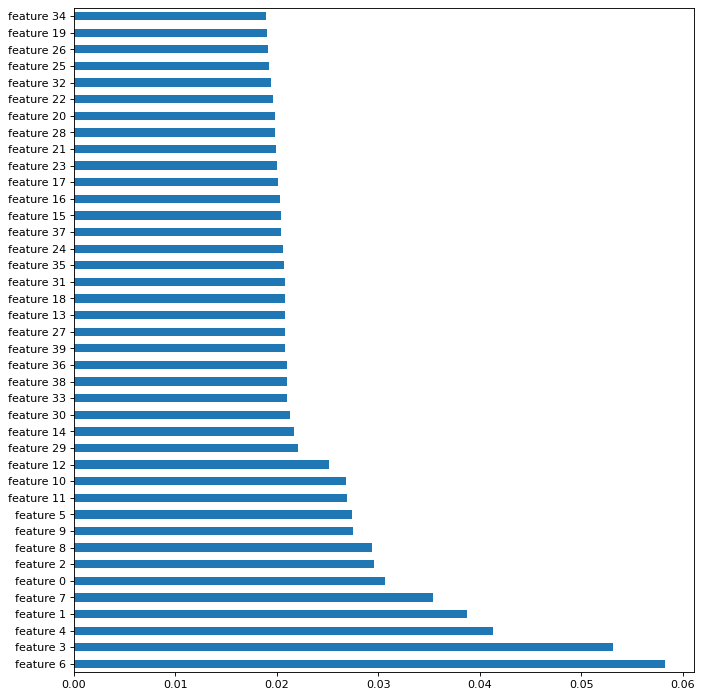

In [13]:
#Feature importance
from matplotlib.pyplot import figure
figure(num = None, figsize=(10,11), dpi = 80, facecolor = 'w', edgecolor = 'k')
feat_importances = pd.Series(trainedforest.feature_importances_, index = feature_names)
feat_importances.nlargest(40).plot(kind = 'barh')

<AxesSubplot:>

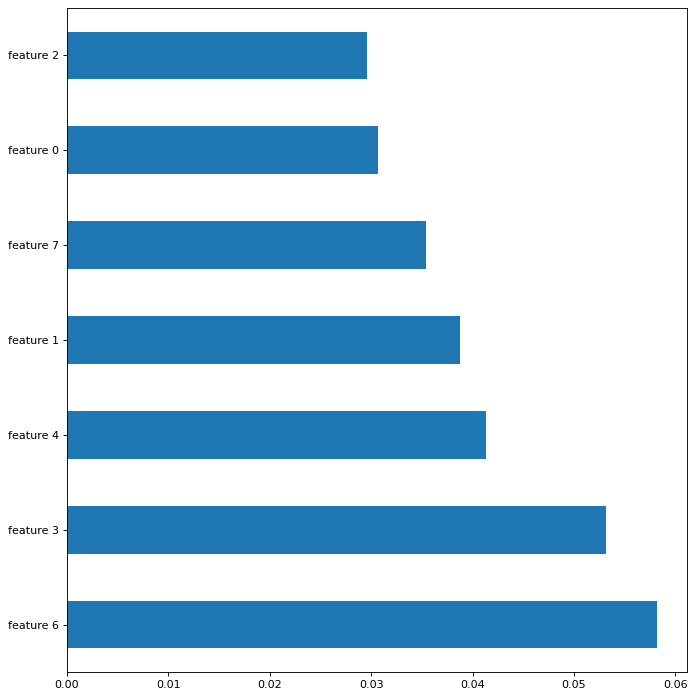

In [14]:
#We use 7 features

from matplotlib.pyplot import figure
figure(num = None, figsize=(10,11), dpi = 80, facecolor = 'w', edgecolor = 'k')
feat_importances = pd.Series(trainedforest.feature_importances_, index = feature_names)
feat_importances.nlargest(7).plot(kind = 'barh')

In [15]:
#We select the 7 features with more importance in our data
X_prueba = X
X_prueb = X_prueba.tolist()
X_pru = []
X_pri = []

for i in range(len(X)):
    for j in range(0,40):
        if j==6 or j==8 or j==3 or j==1 or j==0 or j==7 or j==4:
            X_pru.append(X_prueb[i][j])
    X_pri.append(X_pru)
    X_pru = []
            
                
X_pro = np.array([np.array(xi) for xi in X_pri])
print(X_pro)
len(X_pro)

[[-2.09961716e+02  1.40329727e+02  2.92182655e+01 ... -3.11416149e-01
   2.38069344e+01  4.18138027e+00]
 [-4.15572174e+02 -1.58217010e+01 -5.32404976e+01 ... -6.62748146e+00
   2.20181198e+01  8.31092358e-01]
 [-3.37713928e+02 -7.92690201e+01 -2.19789333e+01 ... -1.66052227e+01
  -2.42225289e+00 -1.58864288e+01]
 ...
 [-2.63763916e+02  1.08203835e+02  1.42176476e+01 ... -1.06825571e+01
   3.67041626e+01 -2.24737453e+01]
 [-1.88085556e+02  4.05243530e+01  1.82351708e+00 ... -8.83461571e+00
   1.93095245e+01 -2.69057655e+01]
 [-1.48702011e+02  6.53274384e+01 -4.06950998e+00 ... -6.78990841e+00
   1.79850903e+01 -3.21687737e+01]]


14852

In [16]:
#wedivide again between train and test
X_train,X_test,y_train,y_test=train_test_split(X_pro,y,test_size=0.2)
X_train.shape
X_test.shape

(2971, 7)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
# No of classes
num_labels=y.shape[1]

In [18]:
#Creation of the model
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(7,)))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [20]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 200
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='./audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
372/372 [==============================] - 2s 4ms/step - loss: 0.5818 - accuracy: 0.8996 - val_loss: 0.4340 - val_accuracy: 0.9179

Epoch 00001: val_loss improved from inf to 0.43399, saving model to ./audio_classification.hdf5
Epoch 2/200
372/372 [==============================] - 1s 4ms/step - loss: 0.4906 - accuracy: 0.9140 - val_loss: 0.4274 - val_accuracy: 0.9179

Epoch 00002: val_loss improved from 0.43399 to 0.42737, saving model to ./audio_classification.hdf5
Epoch 3/200
372/372 [==============================] - 1s 4ms/step - loss: 0.4668 - accuracy: 0.9140 - val_loss: 0.4211 - val_accuracy: 0.9179

Epoch 00003: val_loss improved from 0.42737 to 0.42106, saving model to ./audio_classification.hdf5
Epoch 4/200
372/372 [==============================] - 1s 4ms/step - loss: 0.4597 - accuracy: 0.9139 - val_loss: 0.4201 - val_accuracy: 0.9179

Epoch 00004: val_loss improved from 0.42106 to 0.42011, saving model to ./audio_classification.hdf5
Epoch 5/200
372/372 [=======

In [21]:

# Let's check the accuracy!
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.913833737373352


In [22]:
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x, axis = 1)
predict_x[1]

array([1.5423133e-03, 3.6250101e-03, 1.4632998e-02, 2.1748920e-04,
       1.6956297e-05, 4.0317611e-03, 7.9297379e-06, 3.2063022e-03,
       9.1138048e-05, 1.0787051e-04, 1.9764843e-04, 1.8101615e-07,
       9.0444414e-03, 1.5791878e-02, 4.1858563e-03, 2.4035054e-07,
       1.8287908e-03, 9.0854800e-01, 2.0857019e-07, 2.8002039e-02,
       2.0378418e-03, 2.8832993e-03], dtype=float32)

In [23]:
#Here we split the test audio file
test_audio_dir = '../input/birdclef-2022/test_soundscapes/'
file_list = [f.split('.')[0] for f in sorted(os.listdir(test_audio_dir))]

In [24]:
with open('../input/birdclef-2022/scored_birds.json') as sbfile:
    scored_birds = json.load(sbfile)

In [25]:
pred = {'row_id': [], 'target': []}

In [26]:
# Process audio files and make predictions
for afile in file_list:
    
    # Complete file path
    path = test_audio_dir + afile + '.ogg'
    
    # Open file with librosa and split signal into 5-second chunks
    # sig, rate = librosa.load(path)
    # ...
    
    # Let's assume we have a list of 12 audio chunks (1min / 5s == 12 segments)
    chunks = [[] for i in range(12)]

In [27]:
chunks

[[], [], [], [], [], [], [], [], [], [], [], []]

In [28]:
y_test.shape
predict_x.shape
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#score = f1_score(str(y_test[1]),str(predict_x[1]).replace(".", ""), average = None)
#fil_acc_orig = accuracy_score(X_test,predict_x)

X_test

y



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Let's prepare the test file to create the submision csv

In [29]:
# we will divide the test audio in 12 audios of 5 seconds.

from pydub import AudioSegment
from pydub.utils import make_chunks 
sound = AudioSegment.from_file("../input/birdclef-2022/test_soundscapes/soundscape_453028782.ogg")

chunk_length_ms = 5000 # pydub calculates in millisec 
chunks = make_chunks(sound,chunk_length_ms) #Make chunks of one sec 
for i, chunk in enumerate(chunks): 
    chunk_name = "{0}.ogg".format(i) 
    print ("exporting", chunk_name) 
    chunk.export(chunk_name, format="ogg") 


exporting 0.ogg
exporting 1.ogg
exporting 2.ogg
exporting 3.ogg
exporting 4.ogg
exporting 5.ogg
exporting 6.ogg
exporting 7.ogg
exporting 8.ogg
exporting 9.ogg
exporting 10.ogg
exporting 11.ogg


In [30]:
# Lets exstract the features from the test audio
import librosa
import numpy as np

def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features


import os
extracted_features_=[]
for i in range(0,12):
    file_name = os.path.join(os.path.abspath("./"),str(i) + ".ogg")
    data=features_extractor(file_name)
    extracted_features_.append([data])

In [31]:
import pandas as pd
extracted_features_df_=pd.DataFrame(extracted_features_,columns=['feature'])

In [32]:
X_=np.array(extracted_features_df_['feature'].tolist())

In [33]:
#We use the same features than before
X_prueba = X_
X_prueb = X_prueba.tolist()
X_pru = []
X_pri = []

for i in range(len(X_)):
    for j in range(0,40):
        if j==6 or j==8 or j==7 or j==4 or j==0 or j==1 or j==3:
            X_pru.append(X_prueb[i][j])
    X_pri.append(X_pru)
    X_pru = []
            
                
X_pro = np.array([np.array(xi) for xi in X_pri])

In [34]:
with open('../input/birdclef-2022/scored_birds.json') as sbfile:
    scored_birds = json.load(sbfile)

In [35]:
predict__=model.predict(X_pro)

In [36]:
# This is where we will store our results
pred = {'row_id': [], 'target': []}

# Process audio files and make predictions
for afile in file_list:
    
    # Complete file path
    path = test_audio_dir + afile + '.ogg'
    
    # Open file with librosa and split signal into 5-second chunks
    # sig, rate = librosa.load(path)
    # ...
    
    # Let's assume we have a list of 12 audio chunks (1min / 5s == 12 segments)
    chunks = [[] for i in range(12)]
    
    # Make prediction for each chunk
    # Each scored bird gets a random value in our case
    # since we don't actually have a model
    for i in range(len(chunks)):        
        chunk_end_time = (i + 1) * 5
        j=0
        for bird in scored_birds:
            
            # This is our random prediction score for this bird
            score = predict__[i][j]
            j=j+1
            # Assemble the row_id which we need to do for each scored bird
            row_id = afile + '_' + bird + '_' + str(chunk_end_time)
            
            # Put the result into our prediction dict and
            # apply a "confidence" threshold of 0.5
            pred['row_id'].append(row_id)
            pred['target'].append(True if score > 0.006 else False)

In [37]:
results = pd.DataFrame(pred, columns = ['row_id', 'target'])

# Quick sanity check
print(results.head()) 
    
# Convert our results to csv
results.to_csv("submission.csv", index=False)

                          row_id  target
0  soundscape_453028782_akiapo_5   False
1  soundscape_453028782_aniani_5   False
2  soundscape_453028782_apapan_5   False
3  soundscape_453028782_barpet_5   False
4  soundscape_453028782_crehon_5   False
